### Importando bibliotecas do projeto

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

### Lendo arquivo e instanciando objeto "Dataset"

In [57]:
dataset = pd.read_csv("data/dataset.csv")

### Analise exploratória, limpeza e transformação

In [3]:
#Plotando as 5 primeiras linhas do Dataset
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#Breve descrição estatística das colunas
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
#Removendo coluna "ID":
dataset.drop(["ID"], axis = 1,inplace=True)

In [6]:
#Renomeando algumas colunas do dataset
dicicionario_de_renomeacao = {"default payment next month":"inadimplente","SEX":"Genero","EDUCATION":"Escolaridade",
                             "MARRIAGE":"Estado_Civil","AGE":"Idade"}
dataset.rename(columns=dicicionario_de_renomeacao,inplace=True)

In [7]:
#Checando se há valores nullos 
dataset.isna().sum()

LIMIT_BAL       0
Genero          0
Escolaridade    0
Estado_Civil    0
Idade           0
PAY_0           0
PAY_2           0
PAY_3           0
PAY_4           0
PAY_5           0
PAY_6           0
BILL_AMT1       0
BILL_AMT2       0
BILL_AMT3       0
BILL_AMT4       0
BILL_AMT5       0
BILL_AMT6       0
PAY_AMT1        0
PAY_AMT2        0
PAY_AMT3        0
PAY_AMT4        0
PAY_AMT5        0
PAY_AMT6        0
inadimplente    0
dtype: int64

In [8]:
#Mudando valores da Coluna "Genero", "Escolaridade" e "Estado Civil"
dataset["Genero"].replace({1:0,2:1},inplace=True) 
dataset["Escolaridade"].replace({1:"Pos graduado",2:"Graduado",3:"Ensino médio",4:"outros",0:"",5:"",6:""},inplace=True)
dataset["Estado_Civil"].replace({0:"Desconhecido",1:"Casado",2:"Solteiro",3:"Outro"},inplace=True) 


<AxesSubplot:xlabel='Idade'>

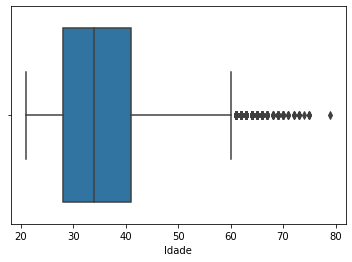

In [9]:
#Verificando distribuição dos dados "Idade".
sns.boxplot(data=dataset, x="Idade")

<AxesSubplot:xlabel='Idade', ylabel='Count'>

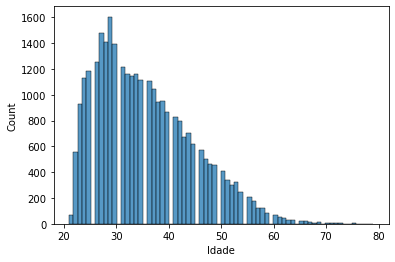

In [10]:
sns.histplot(data=dataset, x="Idade")

In [11]:
# Agrupando a coluna "Idade" (Dados numéricos discretos) em dados categóricos ["Jovem","Adulto, Idoso"]
dataset.loc[dataset['Idade']<30,"Faixa Etária Categórica"]="Jovem"
dataset.loc[dataset['Idade'].between(30,50),"Faixa Etária Categórica"]="Adulto"
dataset.loc[dataset['Idade']>50,"Faixa Etária Categórica"]="Idoso"

In [12]:
#Excluindo valores NA da Coluna "Escolaridade", total = 345
dataset.drop(dataset.loc[dataset["Escolaridade"]==""].index, inplace = True)
print(dataset["Escolaridade"].value_counts())

Graduado        14030
Pos graduado    10585
Ensino médio     4917
outros            123
Name: Escolaridade, dtype: int64


In [13]:
dataset= dataset.drop("Idade",axis=1)

In [14]:
dataset=pd.get_dummies(dataset)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29655 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   LIMIT_BAL                       29655 non-null  int64
 1   Genero                          29655 non-null  int64
 2   PAY_0                           29655 non-null  int64
 3   PAY_2                           29655 non-null  int64
 4   PAY_3                           29655 non-null  int64
 5   PAY_4                           29655 non-null  int64
 6   PAY_5                           29655 non-null  int64
 7   PAY_6                           29655 non-null  int64
 8   BILL_AMT1                       29655 non-null  int64
 9   BILL_AMT2                       29655 non-null  int64
 10  BILL_AMT3                       29655 non-null  int64
 11  BILL_AMT4                       29655 non-null  int64
 12  BILL_AMT5                       29655 non-null  int64
 13  B

In [16]:
#                                                                                                                              #
#                                    Analise exploratória, limpeza e transformação, CONCLUÍDA                                  #
#                                                                                                                              #

### Analisando proporção da variável target (inadimplência)

0    23045
1     6610
Name: inadimplente, dtype: int64


<AxesSubplot:xlabel='inadimplente', ylabel='count'>

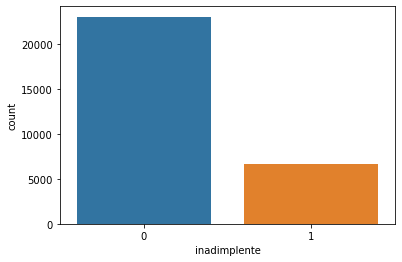

In [17]:
# Verificando proporção entre inadimplentes
print(dataset["inadimplente"].value_counts())
sns.countplot(data=dataset, x="inadimplente")

##### Verificamos aqui um desbalanceamento entre inadimplentes, logo, devemos balancear está classe. Por quê? Porque se vamos
##### alimentar um modelo de ML devemos ensiná-lo de maneira proporcional.

### Dividindo o dataset em treino e teste.

In [18]:
labels = dataset['inadimplente']
features = dataset.drop('inadimplente', axis = 1)
feature_list = list(features.columns)

In [19]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, stratify=labels)

In [20]:
print('Forma das características de treinamento:', train_features.shape) 
print('Forma das etiquetas de treinamento:', train_labels.shape) 
print('Forma das características de teste:', test_features.shape) 
print('Forma das etiquetas de teste:', test_labels.shape)

Forma das características de treinamento: (22241, 31)
Forma das etiquetas de treinamento: (22241,)
Forma das características de teste: (7414, 31)
Forma das etiquetas de teste: (7414,)


### Criando primeiro modelo ML - Random Forest

In [21]:
rnd_clf_v1=RandomForestClassifier(n_estimators=200)

In [22]:
rnd_clf_v1.fit(train_features,train_labels)

RandomForestClassifier(n_estimators=200)

In [23]:
rnd_clf_v1_predictions = rnd_clf_v1.predict(test_features)

In [24]:
print("Accuracy score:", accuracy_score(test_labels, rnd_clf_v1.predict(test_features)))

Accuracy score: 0.8180469382249798


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,rnd_clf_v1.predict(test_features))

array([[5420,  341],
       [1008,  645]], dtype=int64)

In [26]:
##precision
##Recall
##F1
from sklearn.metrics import classification_report
print(classification_report(test_labels,rnd_clf_v1.predict(test_features)))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5761
           1       0.65      0.39      0.49      1653

    accuracy                           0.82      7414
   macro avg       0.75      0.67      0.69      7414
weighted avg       0.80      0.82      0.80      7414



In [27]:
clf_prob= rnd_clf_v1.predict_proba(test_features)[:, 1]

In [28]:
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(test_labels, clf_prob)
roc_value

0.7610695675376484

In [29]:
pd.set_option('display.max_columns', None)
dataset.head()

,LIMIT_BAL,Genero,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,inadimplente,Escolaridade_Ensino médio,Escolaridade_Graduado,Escolaridade_Pos graduado,Escolaridade_outros,Estado_Civil_Casado,Estado_Civil_Desconhecido,Estado_Civil_Outro,Estado_Civil_Solteiro,Faixa Etária Categórica_Adulto,Faixa Etária Categórica_Idoso,Faixa Etária Categórica_Jovem
0,20000,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
1,120000,1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,0,0,1,0,0,1
2,90000,1,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0,0,1,1,0,0
3,50000,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,1,0,0,0,1,0,0
4,50000,0,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,1,0,0,0,0,1,0


### Balanceamento de Classe

0    23045
1     6610
Name: inadimplente, dtype: int64


<AxesSubplot:xlabel='inadimplente', ylabel='count'>

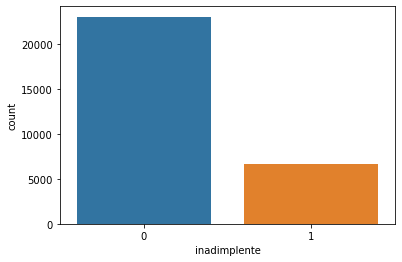

In [30]:
#proporção entre pagantes x não pagantes
print(dataset["inadimplente"].value_counts())
sns.countplot(data=dataset, x="inadimplente")

In [31]:
#!pip install imblearn --user

In [32]:
#conda install -c conda-forge imbalanced-learn

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smt = SMOTE()

In [35]:
train_features,train_labels = smt.fit_resample(train_features,train_labels)

0    17284
1    17284
Name: inadimplente, dtype: int64


C:\Users\kaifr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='inadimplente', ylabel='count'>

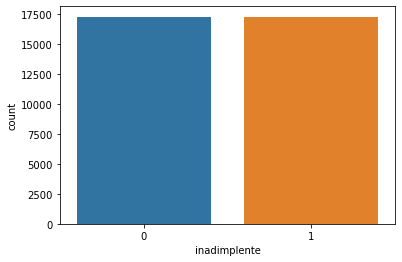

In [36]:
#verificando se os dados foram balanceados
print(train_labels.value_counts())
sns.countplot(train_labels)

In [37]:
rnd_clf_v2=RandomForestClassifier(n_estimators=200)

In [38]:
#Aplicandp novamento o modelo de ML, agora com as dados balanceados
rnd_clf_v2.fit(train_features,train_labels)

RandomForestClassifier(n_estimators=200)

In [39]:
clf_v2_predictions = rnd_clf_v2.predict(test_features)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(test_labels, rnd_clf_v2.predict(test_features)))


Accuracy score: 0.8030752630159158


In [41]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,rnd_clf_v2.predict(test_features)))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      5761
           1       0.58      0.44      0.50      1653

    accuracy                           0.80      7414
   macro avg       0.71      0.67      0.69      7414
weighted avg       0.79      0.80      0.79      7414



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,rnd_clf_v2.predict(test_features))

array([[5227,  534],
       [ 926,  727]], dtype=int64)

### Mapeando a importância das features no aprendizado do modelo

In [43]:
# Calculate feature importances
importances = rnd_clf_v2.feature_importances_

<BarContainer object of 31 artists>

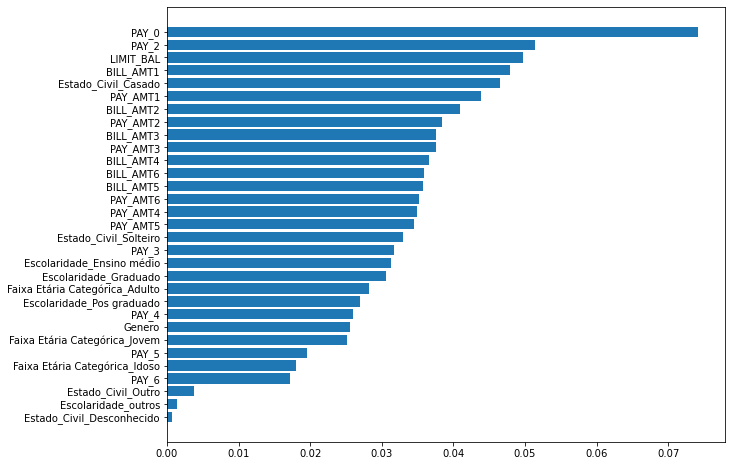

In [44]:
from matplotlib import pyplot as plt
sorted_idx = rnd_clf_v2.feature_importances_.argsort()
plt.figure(figsize=(10, 8))
plt.barh(features.columns[sorted_idx], rnd_clf_v2.feature_importances_[sorted_idx])


### Contruindo a versão 3 do Modelo. 
Aqui o objetivo é simplicar os dados de treino e tornar o algoritmo mais simples

In [45]:
drop_features = ["Faixa Etária Categórica_Adulto","Faixa Etária Categórica_Jovem","Escolaridade_Graduado","PAY_3",
                     "Escolaridade_Ensino médio","Escolaridade_Pos graduado","PAY_4","PAY_5","Genero","Faixa Etária Categórica_Idoso",
                    "PAY_6","Estado_Civil_Outro","Escolaridade_outros","Estado_Civil_Desconhecido"]
features_2 = features.drop(drop_features, axis = 1)

In [46]:
features_2.head()

,LIMIT_BAL,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Estado_Civil_Casado,Estado_Civil_Solteiro
0,20000,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0
1,120000,-1,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0,1
2,90000,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,1
3,50000,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,50000,-1,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1,0


In [47]:
from sklearn.model_selection import train_test_split
train_features_2, test_features_2, train_labels, test_labels = train_test_split(features_2, labels, test_size = 0.25, stratify=labels)

In [48]:
print('Forma das características de treinamento:', train_features_2.shape) 
print('Forma das etiquetas de treinamento:', train_labels.shape) 
print('Forma das características de teste:', test_features_2.shape) 
print('Forma das etiquetas de teste:', test_labels.shape)

Forma das características de treinamento: (22241, 17)
Forma das etiquetas de treinamento: (22241,)
Forma das características de teste: (7414, 17)
Forma das etiquetas de teste: (7414,)


In [49]:
smt = SMOTE()
train_features_2,train_labels = smt.fit_resample(train_features_2,train_labels)

In [50]:
rnd_clf_v3=RandomForestClassifier(n_estimators=200)

In [51]:
rnd_clf_v3.fit(train_features_2,train_labels)

RandomForestClassifier(n_estimators=200)

In [52]:
clf_v3_predictions = rnd_clf_v3.predict(test_features_2)

In [53]:
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(test_labels, rnd_clf_v3.predict(test_features_2)))

Accuracy score: 0.794982465605611


In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,rnd_clf_v3.predict(test_features_2)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5761
           1       0.55      0.47      0.50      1653

    accuracy                           0.79      7414
   macro avg       0.70      0.68      0.69      7414
weighted avg       0.78      0.79      0.79      7414



In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels,rnd_clf_v3.predict(test_features_2))

array([[5123,  638],
       [ 882,  771]], dtype=int64)